In [6]:
import aim_modules as am
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
colors = sns.color_palette("Set2")
sns.set_palette(colors)
%matplotlib inline

In [2]:
# collect all of the TI information
runs = ["run01","run02","run03","run04","run05"]
ti_home = "/Users/ChrisM/Documents/workspace/TI/"
times = ["100ps","250ps","500ps","1ns","5ns","10ns"]
names = ["N","CoulL","VdwL","Count","G","dG","AIMCount","dGCoulL","dGVdwL"]
ti_names = ["dGCoulL","dGVdwL"]

# create a dictionary to hold our results
# each result is a dataframe
# these results aren't comparable because they are for a different setup but we use
# this to init our dictionary
results = {}
for i in times:
    root = ti_home+i
    results[i] = am.import_pickle(root, runs, i)

In [3]:
# collect AIM results
cubic_states = {}
trapz_states = {}
aim_counts = {}
aim_averages = {}
num_lams = 21

aim_dhdl_states = {}
aim_dgdcoul = {}
aim_dgdvdw = {}
aim_dhdl_states = {}
aim_dgdcoul_averages = {}
aim_dgdvdw_averages = {}



df_allk = {}

for j in times:
    totals = []
    cubics = []
    cubic_states[j] = {}
    trapz_states[j] = {}
    aim_counts[j] = {}
    aim_dhdl_states[j] = {}
    aim_dgdcoul[j] = {}
    aim_dgdvdw[j] = {}
    df_allk[j] = {}
    aim_dgdcoulavg = np.zeros(num_lams)
    aim_dgdvdwavg = np.zeros(num_lams)
    avg = np.zeros(num_lams-1)
    for i in runs:
        cubic_states[j][i] = []
        trapz_states[j][i] = []
        aim_dhdl_states[j][i] = []
        file_in = "/Users/ChrisM/Documents/workspace/AIM/{0}/{0}{1}.out".format(j, i)

        aim, aim_cubic, counts, trapz, cubic, dhdl, dgdcoul, dgdvdw, coulLambdas, vdwLambdas = am.quad_AIM(file_in, names)
        totals.append(aim)
        cubics.append(aim_cubic)
        trapz_states[j][i] = trapz
        cubic_states[j][i] = cubic
        aim_dhdl_states[j][i] = dhdl
        aim_dgdcoul[j][i] = dgdcoul
        aim_dgdvdw[j][i] = dgdvdw
        
        aim_averages[j] = {}
            
        aim_dgdcoul[j][i] = dgdcoul
        aim_dgdvdw[j][i] = dgdvdw

    
        for k in range(num_lams-1):
            avg[k] += trapz_states[j][i][k]/len(runs)
        for k in range(num_lams):
            aim_dgdcoulavg[k] += aim_dgdcoul[j][i][k]/len(runs)
            aim_dgdvdwavg[k] += aim_dgdvdw[j][i][k]/len(runs)
        
    df_allk[j]['AIM_VDW'] = aim_dgdvdwavg
        
    results[j]['AIM'] = np.array(totals)
    results[j]['AIM-CUBIC'] = np.array(cubics)
    df_allk[j]['Coul_Lambdas'] = coulLambdas
    df_allk[j]['VdW_Lambdas'] = vdwLambdas

    aim_averages[j] = avg
    



In [4]:
# collect TI results
cubic_states = {}
trapz_states = {}
ti_dhdl_states = {}
ti_dgdcoul_averages = {}
ti_dgdvdw_averages = {}
ti_averages = {}
num_lams = len(coulLambdas)

ti_dgdcoul = {}
ti_dgdvdw = {}

for j in times:
    totals = []
    cubics = []
    cubic_states[j] = {}
    trapz_states[j] = {}
    ti_dhdl_states[j] = {}
    ti_dgdcoul[j] = {}
    ti_dgdvdw[j] = {}
    ti_dgdcoulavg = np.zeros(num_lams)
    ti_dgdvdwavg = np.zeros(num_lams)
    avg = np.zeros(num_lams-1)
    for i in runs:
        file_in = "/Users/ChrisM/Documents/workspace/TI/{0}/{1}.out".format(j, i)
        ti, ti_cubic, trapz, cubic, dhdl, dgdcoul, dgdvdw = am.quad_TI(file_in, ti_names, coulLambdas, vdwLambdas)
        totals.append(ti)
        cubics.append(ti_cubic)
        trapz_states[j][i] = trapz
        cubic_states[j][i] = cubic
        ti_dhdl_states[j][i] = dhdl
        ti_dgdcoul[j][i] = dgdcoul
        ti_dgdvdw[j][i] = dgdvdw

        for k in range(num_lams-1):
            avg[k] += trapz_states[j][i][k]/len(runs)
        for k in range(num_lams):
            ti_dgdcoulavg[k] += ti_dgdcoul[j][i][k]/len(runs)
            ti_dgdvdwavg[k] += ti_dgdvdw[j][i][k]/len(runs)
            
    df_allk[j]['FIXED_VDW'] = ti_dgdvdwavg
    df_allk[j]['Coul_Lambdas'] = coulLambdas
    df_allk[j]['VdW_Lambdas'] = vdwLambdas
    ti_averages[j] = avg


/Users/ChrisM/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


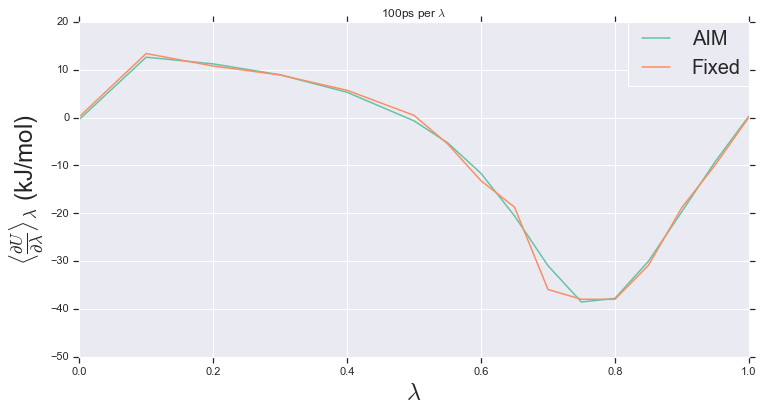

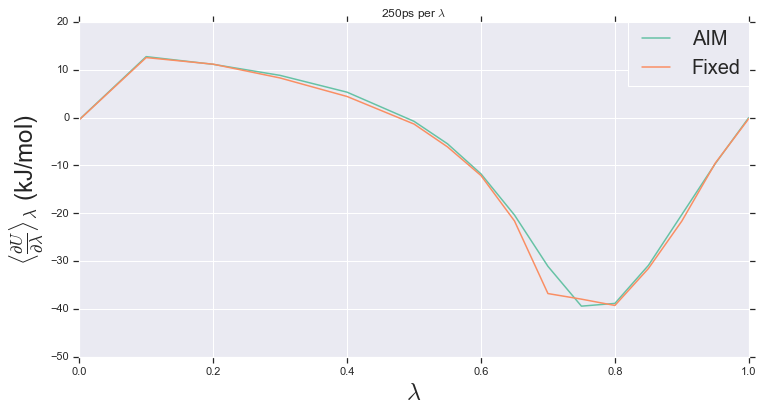

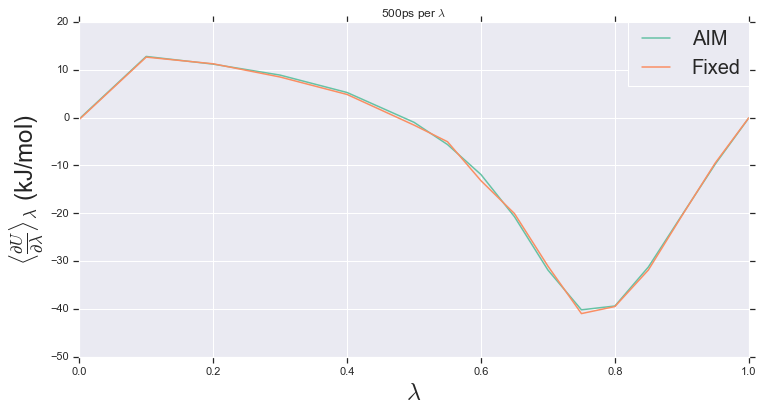

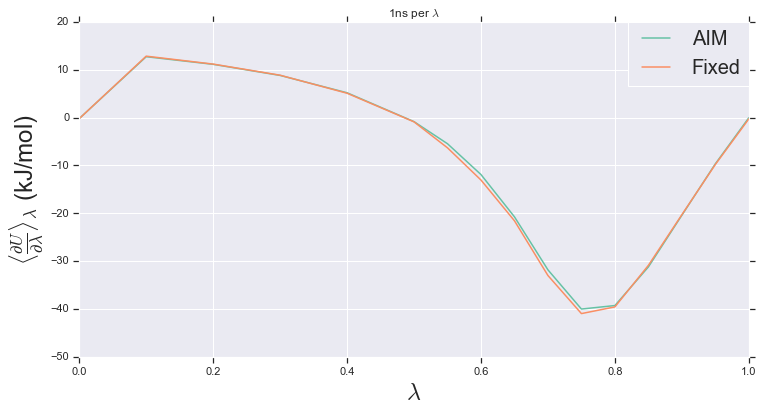

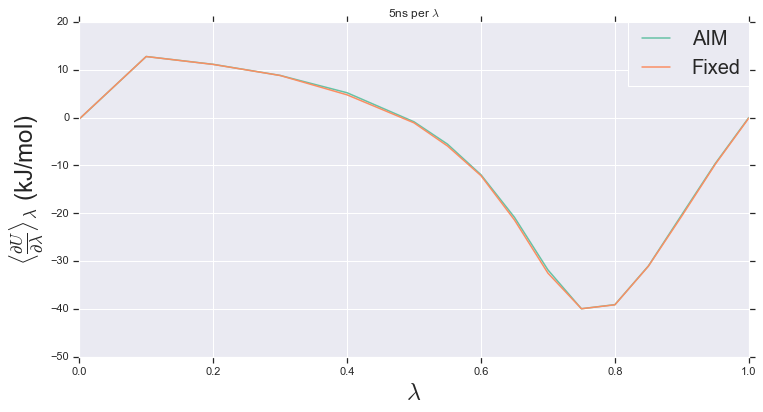

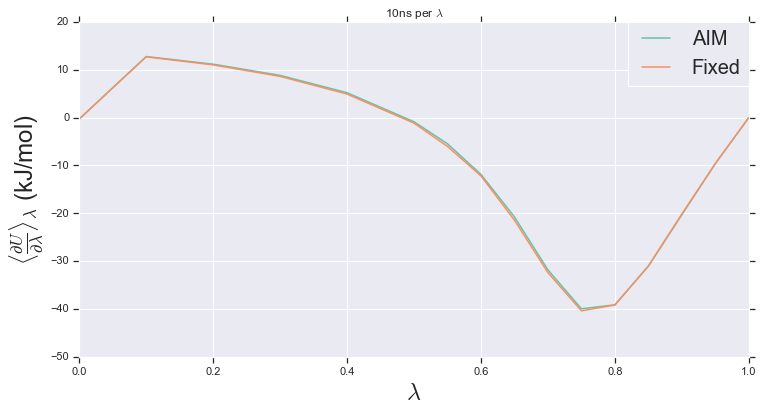

In [7]:
for j in times:
    twentyone_lambdas = pd.DataFrame.from_dict(df_allk[j])
    plt.figure(figsize=(12,6))
    sns.lineplot(x="VdW_Lambdas", y='AIM_VDW', label="AIM", data=twentyone_lambdas);
    sns.lineplot(x="VdW_Lambdas", y="FIXED_VDW", label="Fixed", data=twentyone_lambdas);
    plt.ylabel(r'$\langle\frac{\partial U}{\partial \lambda}\rangle$$_{\lambda}$ (kJ/mol)', fontsize = 24);
    plt.xlabel(r'$\lambda$', fontsize = 24);
    plt.xlim(0.0,1.0);
    plt.ylim(-50, 20);
    plt.title(j + " per $\lambda$");
    plt.legend(loc=0, borderaxespad=0., fontsize=20, ncol=1);

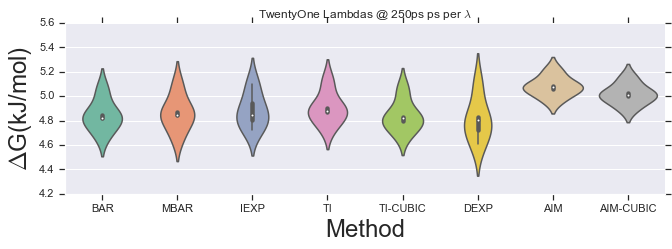

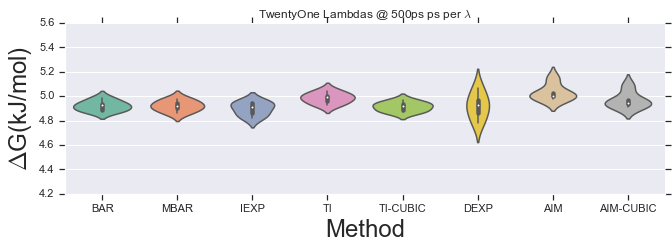

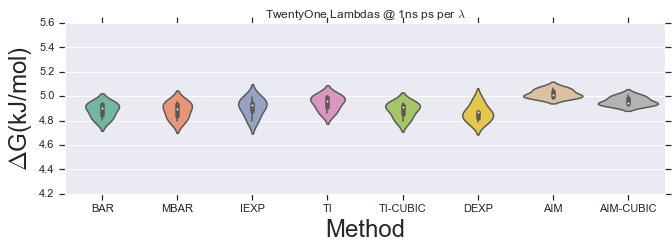

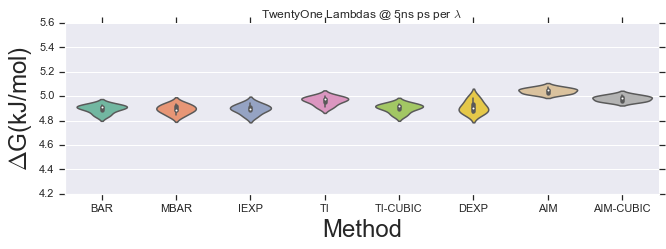

In [18]:
times = ["250ps","500ps","1ns","5ns"]

for i in times:
    twentyone_results = results[i].apply(np.vectorize(am.convert_to_kcal))
    twentyone_results['Number of Lambdas'] = 21
    columns = ['BAR','MBAR','IEXP', 'TI', 'TI-CUBIC', 'DEXP', 'AIM',
           'AIM-CUBIC']
    sns.catplot(data=twentyone_results[columns], notch=False, kind="violin",height=3, aspect=3);
    plt.ylabel(r'$\Delta$G(kJ/mol)', fontsize = 24);
    plt.xlabel(r'Method', fontsize = 24);
    plt.ylim(4.2, 5.6)

    plt.title("TwentyOne Lambdas @ {0} ps per $\lambda$".format(i));

In [23]:
import pandas as pd
import seaborn as sns
sns.set()

keys = ['BAR', 'MBAR', 'IEXP', 'TI', 'TI-CUBIC', 'DEXP', 'AIM', 'AIM-CUBIC']
# Plot the results using error bars for each lambda window
df = pd.DataFrame()
for i in keys:
    ddf = pd.DataFrame()
    ddf['250 ps'] = np.array(results['250ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['500 ps'] = np.array(results['500ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['1 ns'] = np.array(results['1ns'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['5 ns'] = np.array(results['5ns'][i].apply(np.vectorize(am.convert_to_kcal)))

    ddf['key'] = i
    df = pd.concat([df,ddf])

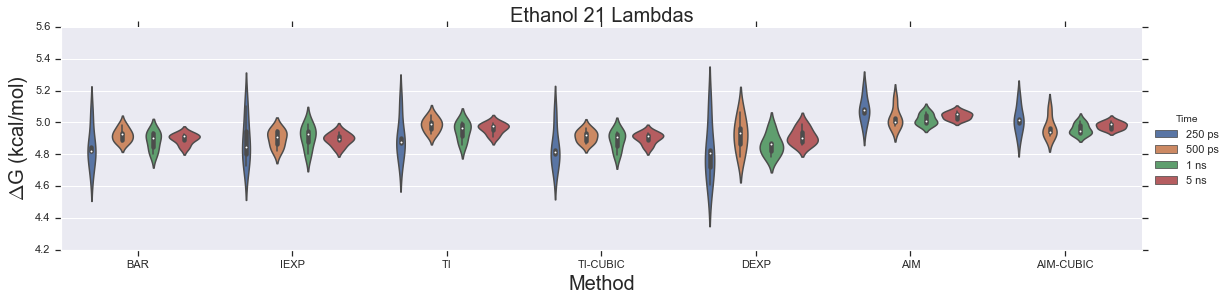

In [33]:
melted_df = pd.melt(df,
                   id_vars = 'key',
                   value_vars = ['250 ps','500 ps', '1 ns', '5 ns'],
                   var_name = 'Time',
                   value_name = 'DeltaG(kcal/mol)')

melted_df.columns = ['Method', 'Time','DeltaG(kcal/mol)']

g = sns.catplot(x="Method",
            y="DeltaG(kcal/mol)",
            hue="Time"
            ,data=melted_df,
            kind="violin",
            height=4,
            aspect=4,
            legend_out=True)

plt.ylabel("$\Delta$G (kcal/mol)", fontsize = 20)
plt.xlabel("Method", fontsize = 20)
plt.title("Ethanol 21 Lambdas", fontsize=20);



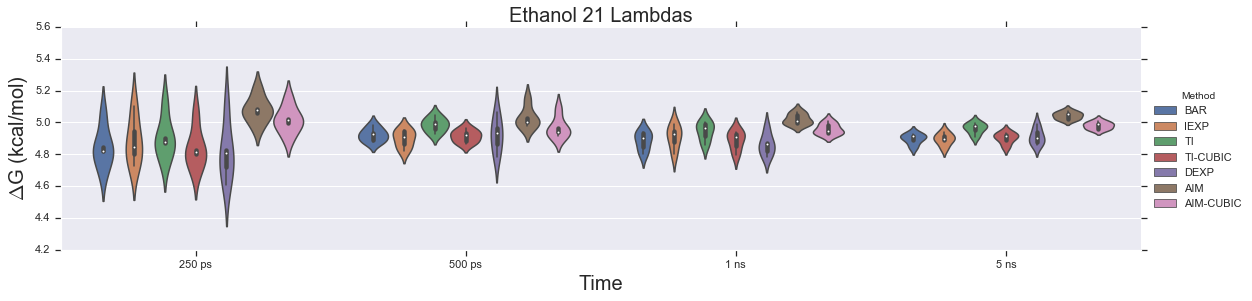

In [32]:
melted_df = pd.melt(df,
                   id_vars = 'key',
                   value_vars = ['250 ps','500 ps','1 ns', '5 ns'],
                   var_name = 'Time',
                   value_name = 'DeltaG(kcal/mol)')

melted_df.columns = ['Method', 'Time','DeltaG(kcal/mol)']

g = sns.catplot(x="Time",
            y="DeltaG(kcal/mol)",
            hue="Method"
            ,data=melted_df,
            kind="violin",
            height=4,
            aspect=4,
            legend_out=True)

plt.ylabel("$\Delta$G (kcal/mol)", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.title("Ethanol 21 Lambdas", fontsize=20);


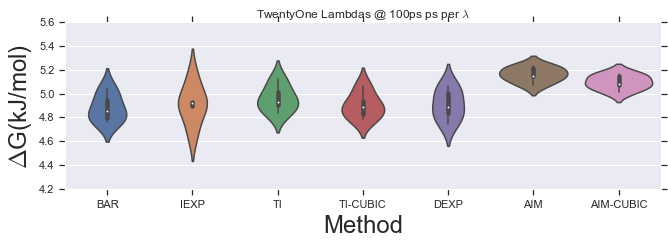

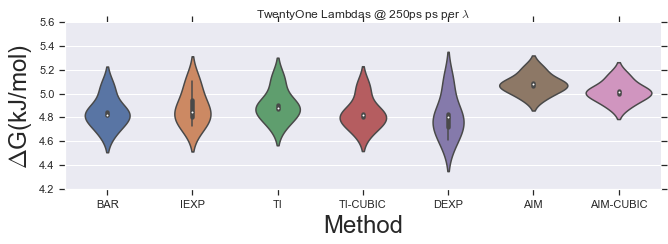

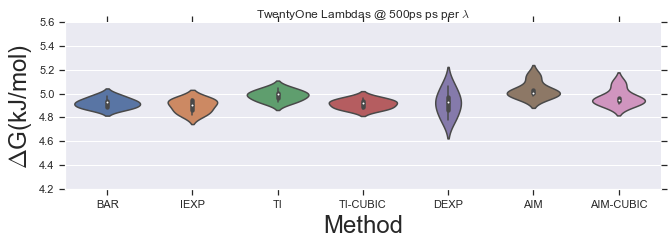

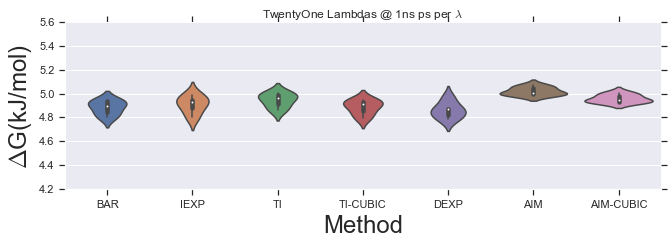

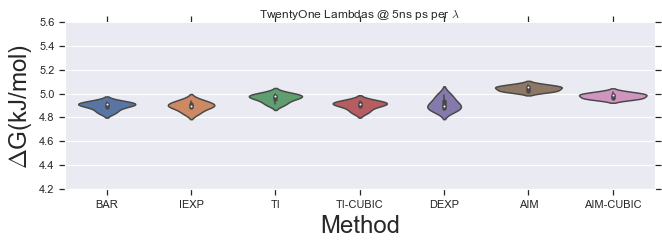

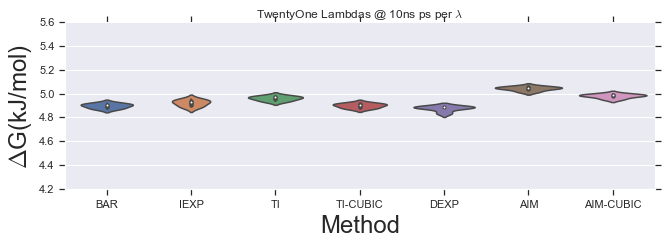

In [29]:
times = ["100ps","250ps","500ps","1ns","5ns","10ns"]

for i in times:
    twentyone_results = results[i].apply(np.vectorize(am.convert_to_kcal))
    twentyone_results['Number of Lambdas'] = 21
    columns = ['BAR', 'IEXP', 'TI', 'TI-CUBIC', 'DEXP', 'AIM',
           'AIM-CUBIC']
    sns.catplot(data=twentyone_results[columns], notch=False, kind="violin",height=3, aspect=3);
    plt.ylabel(r'$\Delta$G(kJ/mol)', fontsize = 24);
    plt.xlabel(r'Method', fontsize = 24);
    plt.ylim(4.2, 5.6)

    plt.title("TwentyOne Lambdas @ {0} ps per $\lambda$".format(i));

In [37]:
import pandas as pd
import seaborn as sns
sns.set()

keys = ['BAR', 'IEXP', 'TI', 'TI-CUBIC', 'DEXP', 'AIM', 'AIM-CUBIC']
# Plot the results using error bars for each lambda window
df = pd.DataFrame()
for i in keys:
    ddf = pd.DataFrame()
    ddf['100 ps'] = np.array(results['100ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['250 ps'] = np.array(results['250ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['500 ps'] = np.array(results['500ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['1 ns'] = np.array(results['1ns'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['5 ns'] = np.array(results['5ns'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['10 ns'] = np.array(results['10ns'][i].apply(np.vectorize(am.convert_to_kcal)))


    ddf['key'] = i
    df = pd.concat([df,ddf])

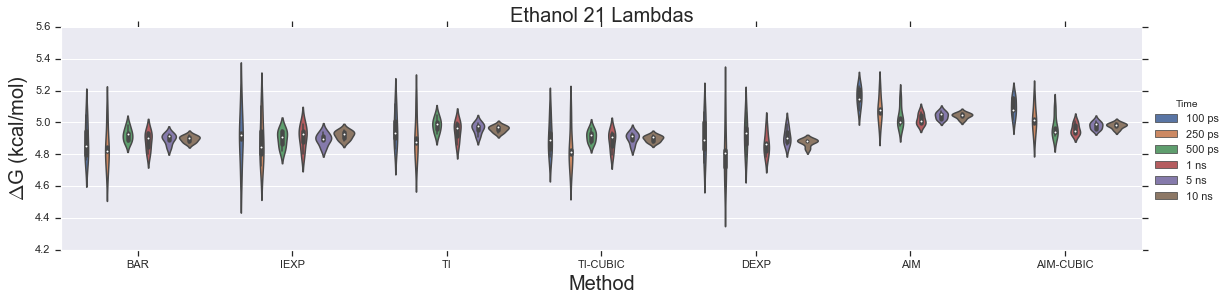

In [38]:
melted_df = pd.melt(df,
                   id_vars = 'key',
                   value_vars = ['100 ps','250 ps','500 ps', '1 ns','5 ns', '10 ns'],
                   var_name = 'Time',
                   value_name = 'DeltaG(kcal/mol)')

melted_df.columns = ['Method', 'Time','DeltaG(kcal/mol)']

g = sns.catplot(x="Method",
            y="DeltaG(kcal/mol)",
            hue="Time"
            ,data=melted_df,
            kind="violin",
            height=4,
            aspect=4,
            legend_out=True)

plt.ylabel("$\Delta$G (kcal/mol)", fontsize = 20)
plt.xlabel("Method", fontsize = 20)
plt.title("Ethanol 21 Lambdas", fontsize=20);


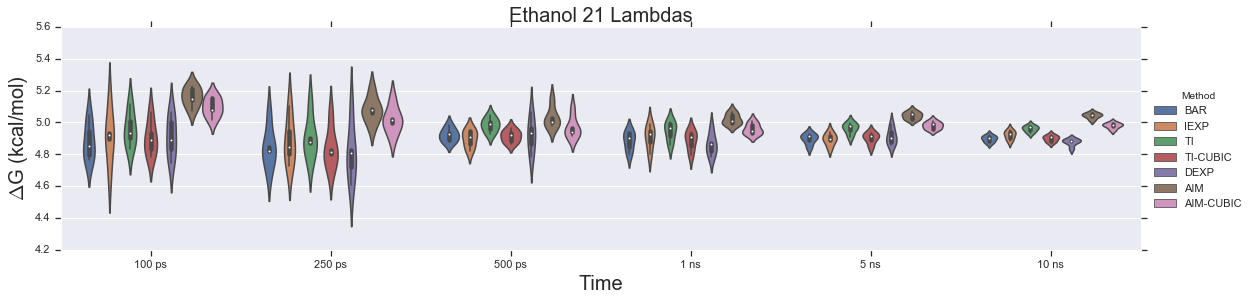

In [39]:
melted_df = pd.melt(df,
                   id_vars = 'key',
                   value_vars = ['100 ps','250 ps','500 ps', '1 ns','5 ns', '10 ns'],
                   var_name = 'Time',
                   value_name = 'DeltaG(kcal/mol)')

melted_df.columns = ['Method', 'Time','DeltaG(kcal/mol)']

g = sns.catplot(x="Time",
            y="DeltaG(kcal/mol)",
            hue="Method"
            ,data=melted_df,
            kind="violin",
            height=4,
            aspect=4,
            legend_out=True)

plt.ylabel("$\Delta$G (kcal/mol)", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.title("Ethanol 21 Lambdas", fontsize=20);



([<matplotlib.axis.YTick at 0x1a1ceeabd0>,
 <a list of 7 Text yticklabel objects>)

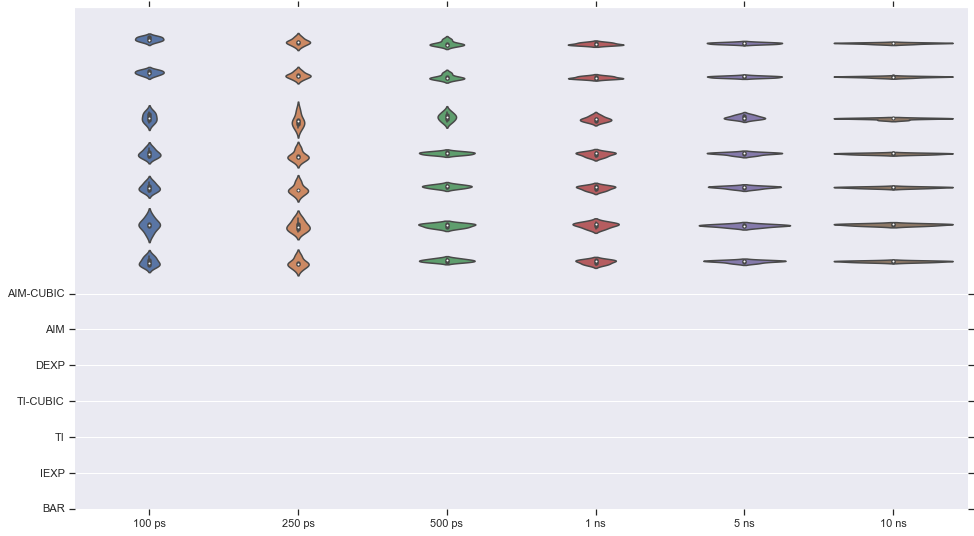

In [49]:
import numpy as np
from matplotlib import pyplot as plt

###############################################################################
# The data (change all of this to your actual data, this is just a mockup)
variables = ['BAR',
        'IEXP',
        'TI',
        'TI-CUBIC',
        'DEXP',
        'AIM',
        'AIM-CUBIC']


base = 0



###############################################################################
# The actual drawing part

# The y position for each variable
ys = np.linspace(0,6,len(variables)) # top to bottom
plt.figure(figsize=(16,9))
# Plot the bars, one by one
for y, i in zip(ys, variables):
    df = pd.DataFrame()
    df['100 ps'] = np.array(results['100ps'][i].apply(np.vectorize(am.convert_to_kcal))) + 2 + y
    df['250 ps'] = np.array(results['250ps'][i].apply(np.vectorize(am.convert_to_kcal))) + 2 + y
    df['500 ps'] = np.array(results['500ps'][i].apply(np.vectorize(am.convert_to_kcal))) + 2 + y
    df['1 ns'] = np.array(results['1ns'][i].apply(np.vectorize(am.convert_to_kcal))) + 2 + y
    df['5 ns'] = np.array(results['5ns'][i].apply(np.vectorize(am.convert_to_kcal))) + 2 + y
    df['10 ns'] = np.array(results['10ns'][i].apply(np.vectorize(am.convert_to_kcal))) + 2 + y

    sns.violinplot(data=df)


# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)

# Make the y-axis display the variables
plt.yticks(ys, variables)

# Set the portion of the x- and y-axes to show
#plt.ylim(5.2, 15.5);